In [1]:
#importing pandas and matplotlib

import pandas as pd
import matplotlib.pyplot as plt

  


In [3]:
#path of the data set saved on the computer
file_path =  r"C:\Users\suhai\OneDrive\API_SP.POP.TOTL_DS2_en_csv_v2_703697.xlsx"
df = pd.read_excel(file_path)
#print(df.head())


In [4]:
#identifying and separating key columns from the data set

metadata_columns= df.columns[0:4]
#print(metadata_columns)

year_columns= df.columns[4:]
#print(year_columns)

In [5]:
#melting the dataframe to long format

df_melted = pd.melt(df, id_vars=metadata_columns, value_vars =year_columns, var_name= 'Year' , value_name ='Population')
#print(df_melted.head())

In [6]:
#converting 'Year' and 'Population' to numeric format 

df_melted['Year'] = pd.to_numeric(df_melted['Year'], errors='coerce')
df_melted['Population'] = pd.to_numeric(df_melted['Population'], errors='coerce')

In [7]:
#removing rows with NaN values in 'Year' and 'Population' columns

df_melted = df_melted.dropna(subset=['Year' , 'Population'])

In [8]:
#creating a list of colors of the South African flag
colors=['black','yellow','green','grey','red','blue']

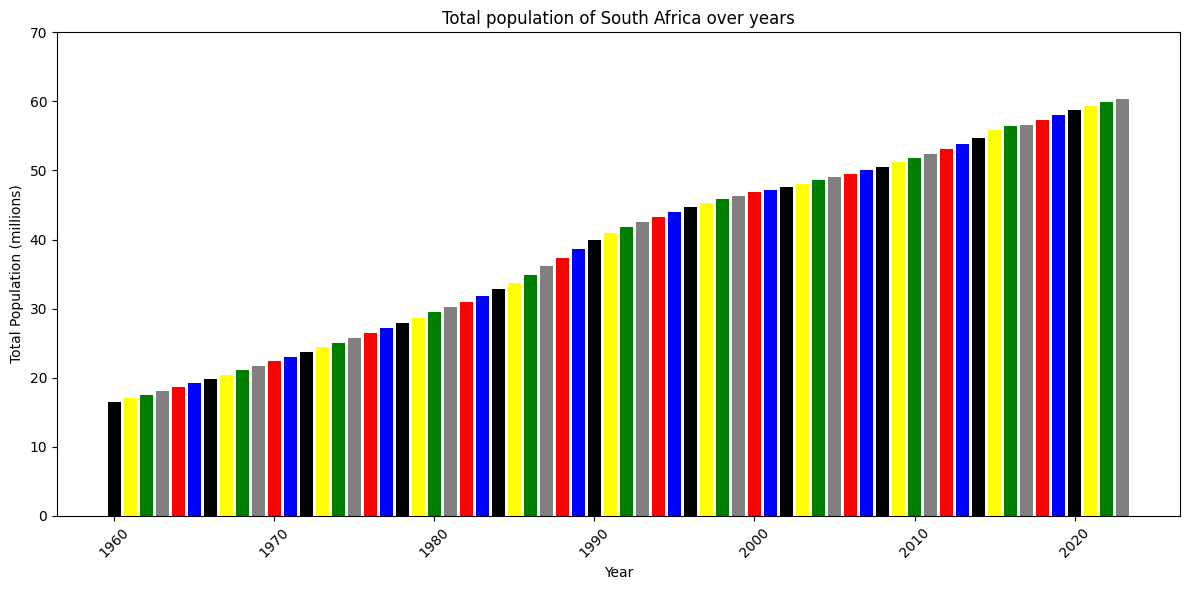

In [9]:
#Plotting the data 

sa_data  = df_melted[df_melted['Country Name'] == 'South Africa' ]

plt.figure(figsize=(12,6))
bars=plt.bar(sa_data['Year'], sa_data['Population'], color=[colors[i%len(colors)]for i in range(len(sa_data))], label='SouthAfrica')
# bar in bars:
#        height = bar.get_height()
#       plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}', ha='center', va='bottom',rotation=90)
max_population = sa_data['Population'].max()
y_ticks = range(0, int(max_population) +10000000,10000000)
plt.yticks(y_ticks,[f'{i//1000000}' for i in y_ticks])

plt.xlabel('Year')
plt.ylabel('Total Population (millions)')
plt.title('Total population of South Africa over years' )
plt.xticks(rotation=45)
#plt.legend(loc='upper left', bbox_to_anchor=(1,1))

#plt.bar_label(bars, labels=sa_data['Population'], label_type='edge')

plt.tight_layout()
plt.show()
